In [1]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing_part_sepsis import *
from cv_fold_part import *
from eval_part import *
from prepare_training_part import *
from training_part import *
from utils import *
from models import *
from kde_part import *
import os


print("imports done")
np.set_printoptions(threshold=np.inf)
colors_map = {"baseline":"black","linear":"orange","cnn_sum":"gold","cnn_pure":"red"}

imports done
imports done
imports done


In [2]:
np.random.seed(42)
domains_xs, domains_ys = load_sepsis_data("../../data/physionet_training_setA_interpolated_merged.csv")

In [3]:
domains = 1000
np.random.seed(42)
domains_emb = kde_part(domains_xs[:domains], kernel="gaussian", bandwidth=0.03, points=100)

0
100
200
300
400
500
600
700
800
900


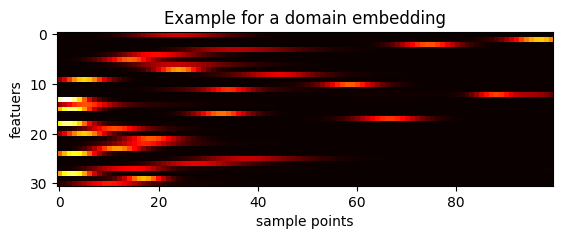

In [4]:
diff_domains = []
for i in domains_emb:
    for j in i:
        diff_domains.append(j[0])
diff_domains = np.array(diff_domains)
plt.title("Example for a domain embedding")
plt.imshow(np.mean(diff_domains,axis=0), cmap="hot")
plt.ylabel("featuers")
plt.xlabel("sample points")
plt.show()


In [5]:
np.random.seed(42)
splits = cv_fold_part(len(domains_emb), 3)

In [6]:
# experiment_name = "sepsis_full_one_split"
# device = "mps"

# weight = torch.tensor([1,500]) # higher weight for positive class
# criterion = nn.BCEWithLogitsLoss(pos_weight=weight).to(device)


# for s,split in enumerate(splits):
#     # good model configurations
#     model_list = [
#                 ]
#     # baseline model
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=31,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))

#     #sum - in correct order (best to worst)
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=50,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=51,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=2,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=51,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=40,
#         evaluation_input_size=71,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))

#     #cnn pure
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=41,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=9,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=15,
#         evaluation_input_size=46,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=13,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=41,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=31,
#         embedding_size=100,
#         embedding_nr_layers=9,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=41,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))

#     #linear
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=31,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=5,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=31,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=41,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=31,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=41,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=31,
#         embedding_nr_layers=5,
#         embedding_neurons=200,
#         embedding_head_class=head_linear,
#         hidden_size=20,
#         evaluation_input_size=51,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=31,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=20,
#         evaluation_input_size=51,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=2,
#     ))
#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=10,max_epochs=1000, lr=0.001, split_nr=s,model_list = model_list,device=device,criterion=criterion)
#     break

# Evaluation Grid Search

In [17]:
experiment_name = "sepsis_grid_search"

all_models = os.listdir("models")
model_names = [m[:-7] for m in all_models if m.startswith(experiment_name)]
model_names = sorted(list(set(model_names)))
types = [i.split("|")[0].split("-")[1] for i in model_names]
colors = [colors_map[i] for i in types]

In [8]:
# device = "mps"
# torch.manual_seed(42)
# np.random.seed(42)
# weight = torch.tensor([1,500]) # higher weight for positive class
# criterion = nn.BCEWithLogitsLoss(pos_weight=weight).to(device)

# all_split_data = []
# model_list = []

# print(len(model_names), model_names)

# for s,split in enumerate(splits):
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=1024)
#     s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names, split_nr=s,criterion=criterion,device=device,debug=True)
#     s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names, split_nr=s,criterion=criterion,device=device,debug=True)
#     print(s_res1)
#     print(s_res2)

#     all_split_data.append(s_res1)
#     all_split_data.append(s_res2)

#     evaluation_results_array = np.array(all_split_data)
#     np.save("evaluation_results_sepsis_grid_search",evaluation_results_array)

# device = "mps"
# all_f1_scores = []
# for s,split in enumerate(splits):
#     print("split",s)
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     f1_scores1 = eval_f1_score(test1_loader,1,model_names,"models",s,device=device)
#     print("f1 1 done")
#     f1_scores2 = eval_f1_score(test2_loader,0,model_names,"models",s,device=device)
#     all_f1_scores.append(f1_scores1)
#     all_f1_scores.append(f1_scores2)
#     np.save("f1_scores_sepsis_grid_search",np.array(all_f1_scores))

194 ['sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-100-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-1000-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-200-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-500-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-100-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-1000-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-200-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-500-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-100-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-1000-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-200-2-0.3', 'sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|hea

(6, 194, 100)
(194, 100)


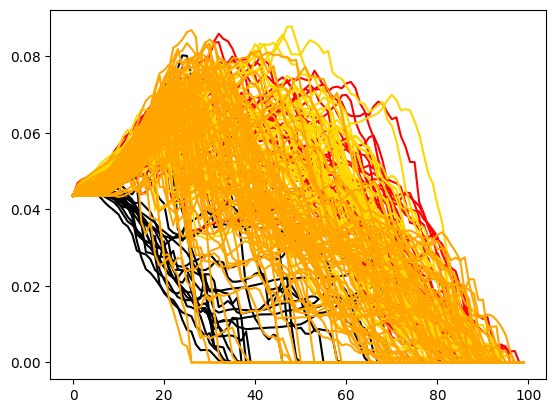

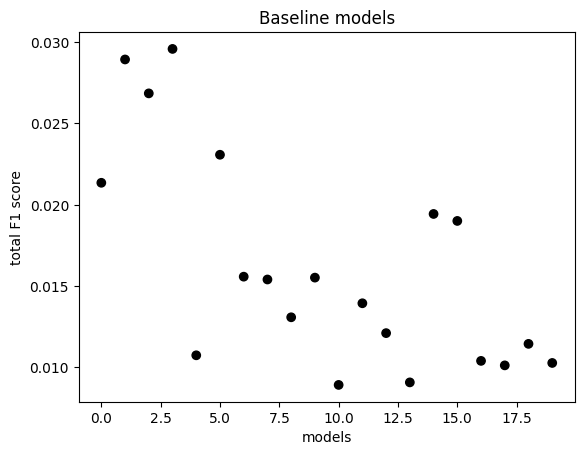

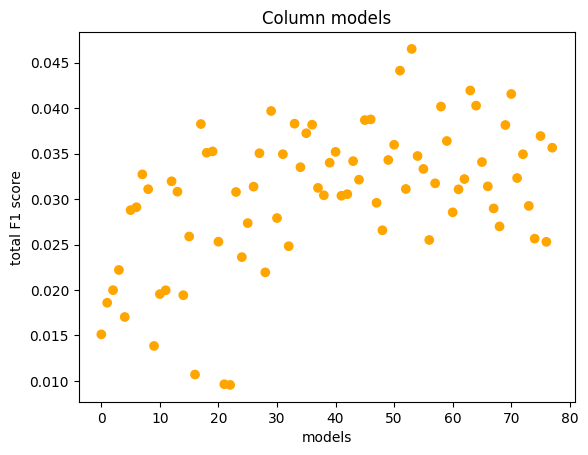

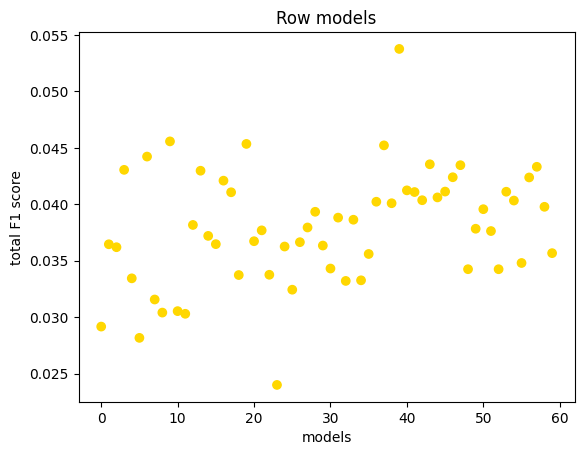

In [51]:
evaluation_results_array = np.load("f1_scores_sepsis_grid_search.npy")
print(evaluation_results_array.shape)
evaluation_results_array_mean = np.mean(evaluation_results_array,axis=0)
evaluation_results_array_total_mean = np.mean(evaluation_results_array_mean,axis=1)
print(evaluation_results_array_mean.shape)
for i in range(len(evaluation_results_array_mean)):
    plt.plot(evaluation_results_array_mean[i],label=model_names[i],color=colors[i])
plt.show()

models_baseline = np.array([i=="baseline" for i in types])
colors_baseline = np.array(colors)[models_baseline]
models_linear = np.array([i=="linear" for i in types])
colors_linear = np.array(colors)[models_linear]
models_cnn_sum = np.array([i=="cnn_sum" for i in types])
colors_cnn_sum = np.array(colors)[models_cnn_sum]
models_cnn_pure = np.array([i=="cnn_pure" for i in types])
colors_cnn_pure = np.array(colors)[models_cnn_pure]

def plot_scatter_grid(models,colors,title):
    plt.scatter(np.arange(len(evaluation_results_array_total_mean[models])),evaluation_results_array_total_mean[models],color=colors)
    plt.xlabel("models")
    plt.ylabel("total F1 score")
    plt.title(title)
    plt.show()

plot_scatter_grid(models_baseline,colors_baseline,"Baseline models")
plot_scatter_grid(models_linear,colors_linear,"Column models")
plot_scatter_grid(models_cnn_sum,colors_cnn_sum,"Row models")
plot_scatter_grid(models_cnn_pure,colors_cnn_pure,"CNN models")

# Evaluation training on full data set of best models

In [9]:
experiment_name = "sepsis_full_one_split"

all_models = os.listdir("models")
model_names = [m[:-7] for m in all_models if m.startswith(experiment_name)]
model_names = sorted(list(set(model_names)))
types = [i.split("|")[0].split("-")[1] for i in model_names]
colors = [colors_map[i] for i in types]
print(len(model_names))

16


In [19]:
# device = "mps"
# torch.manual_seed(42)
# np.random.seed(42)
# weight = torch.tensor([1,500]) # higher weight for positive class
# criterion = nn.BCEWithLogitsLoss(pos_weight=weight).to(device)

# all_split_data = []
# model_list = []

# print(len(model_names), model_names)

# for s,split in enumerate(splits):
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=1024)
#     s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names, split_nr=s,criterion=criterion,device=device)
#     s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names, split_nr=s,criterion=criterion,device=device)
#     print(s_res1)
#     print(s_res2)

#     all_split_data.append(s_res1)
#     all_split_data.append(s_res2)
#     break

# evaluation_results = np.array(all_split_data)
# np.save("evaluation_results_sepsis_large",evaluation_results)

split 0
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-100-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-1000-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-200-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-1-500-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-100-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-1000-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-200-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-2-500-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-100-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-1000-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-200-2-0.3
sepsis_grid_search-baseline|head_empty-0-0-0-1-0-0.3|head_linear-31-1-3-500-2-0.3
sepsi

In [11]:
# device = "mps"
# all_f1_scores = []
# for s,split in enumerate(splits):
#     print("split",s)
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     f1_scores1 = eval_f1_score(test1_loader,1,model_names,"models",s,device=device)
#     print("f1 1 done")
#     f1_scores2 = eval_f1_score(test2_loader,0,model_names,"models",s,device=device)
#     all_f1_scores.append(f1_scores1)
#     all_f1_scores.append(f1_scores2)
#     break
# np.save("f1_scores_sepsis_large",np.array(all_f1_scores))

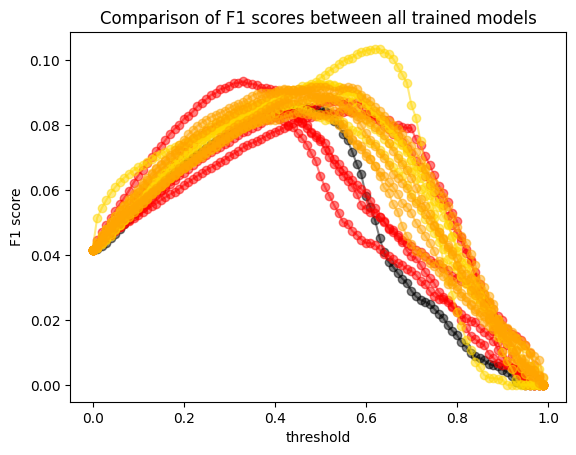

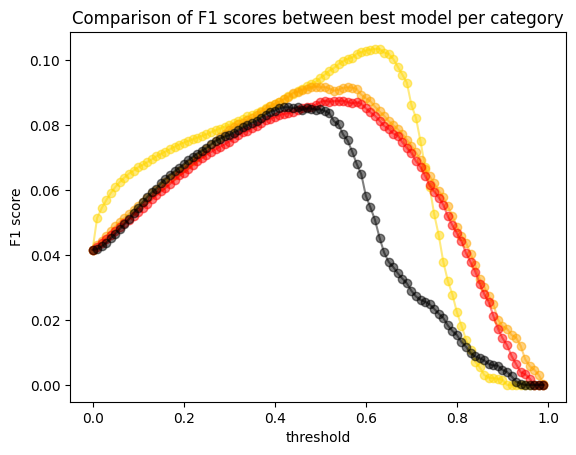

3 sepsis_full_one_split-cnn_pure|head_cnn_pure-31-100-5-32-10-0.3|head_linear-41-1-1-500-2-0.3 0.04934698606328333
7 sepsis_full_one_split-cnn_sum|head_cnn_weighted_sum-31-100-1-50-20-0.3|head_linear-51-1-1-500-2-0.3 0.06436711613081655
13 sepsis_full_one_split-linear|head_linear-100-31-4-500-10-0.3|head_linear-41-1-1-500-2-0.3 0.06337908594414124
10 sepsis_full_one_split-cnn_sum|head_cnn_weighted_sum-31-100-4-100-5-0.3|head_linear-36-1-1-500-2-0.3 0.06299512619855763
8 sepsis_full_one_split-cnn_sum|head_cnn_weighted_sum-31-100-2-300-5-0.3|head_linear-36-1-1-500-2-0.3 0.06222181333331512


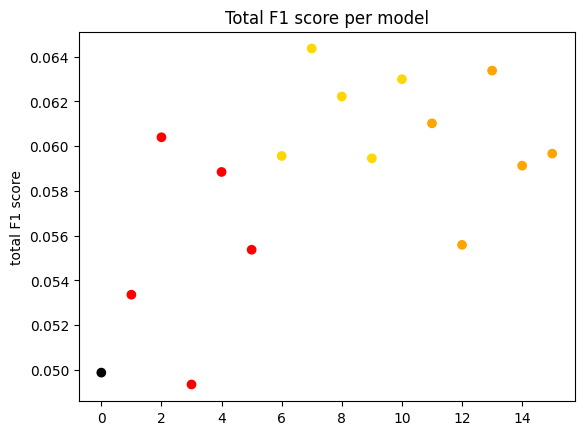

In [12]:
all_f1_scores = np.load("f1_scores_sepsis_large.npy")
all_f1_scores = np.array(all_f1_scores)

all_f1_scores_mean = all_f1_scores.mean(axis=0)
mean_f1_scores = np.mean(all_f1_scores_mean,axis=1)

for i in range(len(model_names)):
    plt.plot(np.arange(0,1,0.01),all_f1_scores_mean[i],marker="o", label=model_names[i],color = colors[i],alpha=0.5)
plt.title("Comparison of F1 scores between all trained models")
plt.xlabel("threshold")
plt.ylabel("F1 score")
plt.show()

best_models_per_category = [7,13,2,0]

for i in best_models_per_category:
    plt.plot(np.arange(0,1,0.01),all_f1_scores_mean[i],marker="o", label=model_names[i],color = colors[i],alpha=0.5)
plt.title("Comparison of F1 scores between best model per category")
plt.xlabel("threshold")
plt.ylabel("F1 score")
plt.show()


#print the top x models
best_models = np.argsort(mean_f1_scores)
for i in range(5):
    idx = best_models[-i]
    print(idx, model_names[idx], mean_f1_scores[idx])#, np.mean(evaluation_results,axis=0)[idx])

plt.scatter(np.arange(len(mean_f1_scores)),mean_f1_scores, c=colors)
plt.ylabel("total F1 score")
plt.title("Total F1 score per model")
plt.show()

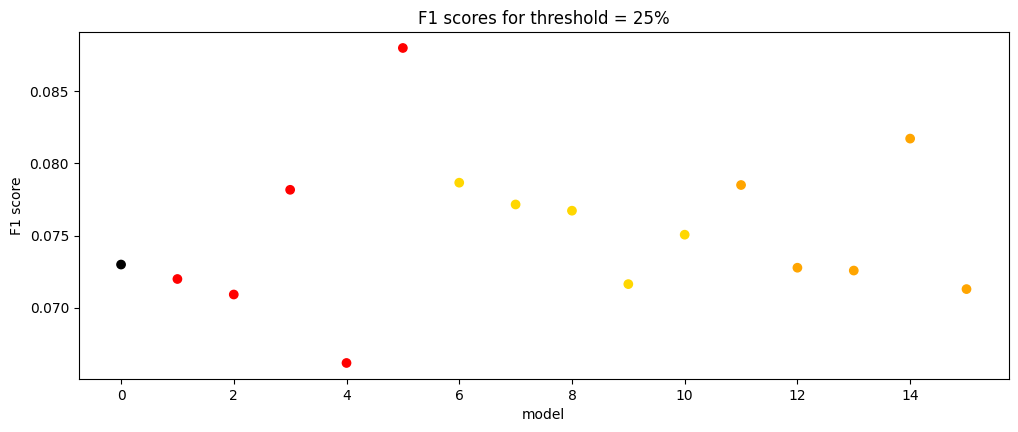

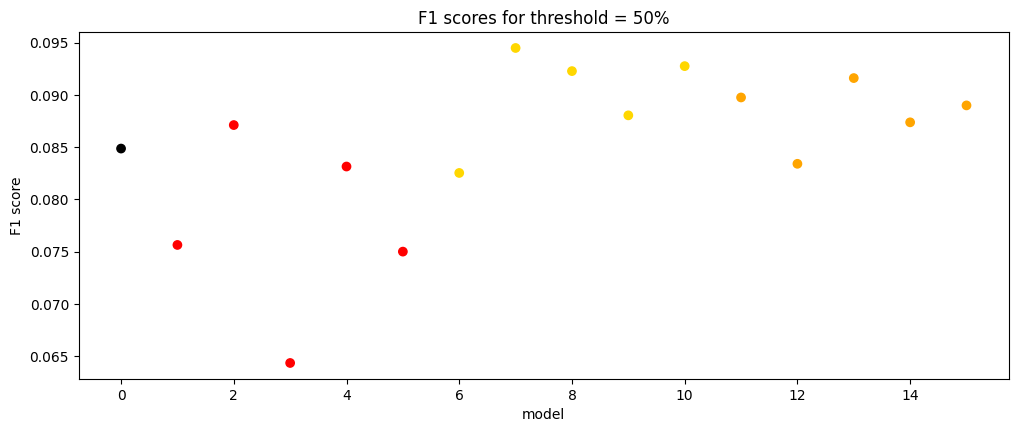

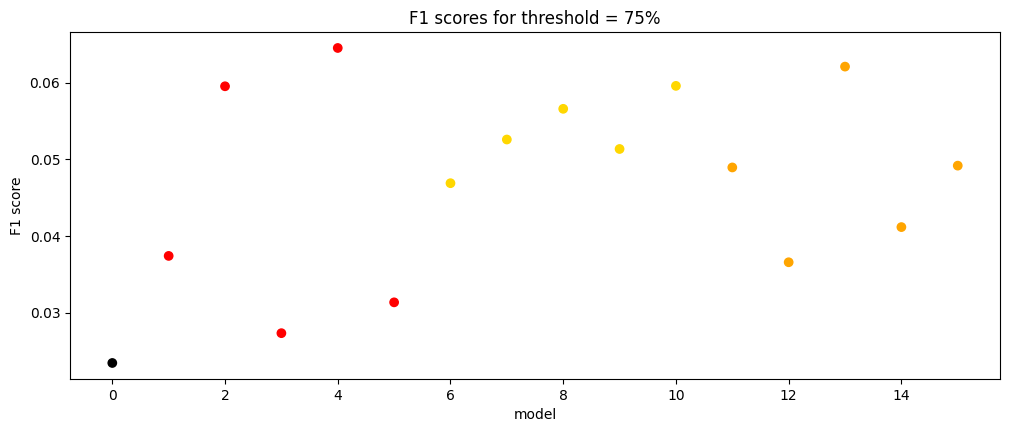

In [13]:
def f1_by_threshold(threshold):
    plt.figure(figsize=(12,4.5))
    plt.title(f"F1 scores for threshold = {threshold}%")
    plt.ylabel("F1 score")
    plt.xlabel("model")
    plt.scatter(np.arange(len(mean_f1_scores)),np.mean(all_f1_scores,axis=0)[:,threshold], c=colors)
    plt.show()

f1_by_threshold(25)
f1_by_threshold(50)
f1_by_threshold(75)
